In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os #to look for your image

from skimage import io #to load the imported image as ndarray
from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte

In [4]:
file = os.path.join('gro1r.jpg')
im = io.imread(file)

# Load picture and detect edges
image = img_as_ubyte(im)

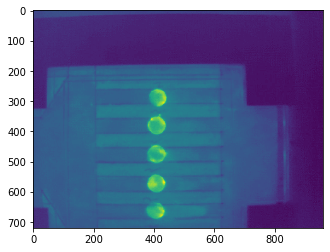

In [5]:
plt.imshow(im)

In [6]:
from skimage.exposure import histogram #first step for image segmentation
hist, hist_centers = histogram(im)

In [8]:
edges = canny(im/255.) #capatures well the circle or any shape

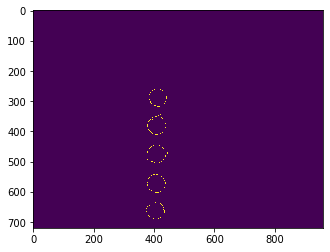

In [22]:
plt.imshow(edges)

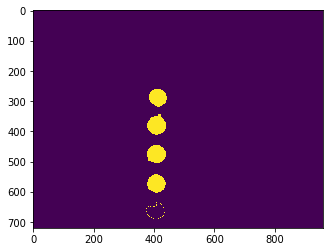

In [48]:
from scipy import ndimage as ndi
fill_im = ndi.binary_fill_holes(edges) 
plt.imshow(fill_im)

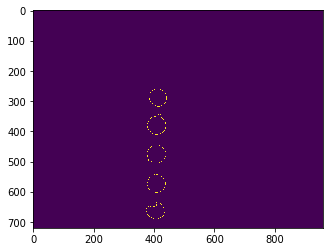

In [50]:
label_objects, nb_labels = ndi.label(edges)
sizes = np.bincount(label_objects.ravel())
mask_sizes = sizes > 1
mask_sizes[0] = 0
im_cleaned = mask_sizes[label_objects]
plt.imshow(im_cleaned)

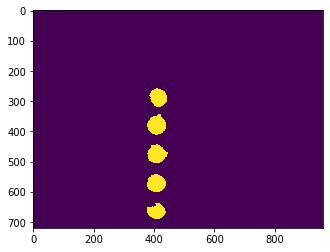

In [68]:
markers = np.zeros_like(im)
markers[im < 3] = 1
markers[im > 100] = 2
plt.imshow(markers)

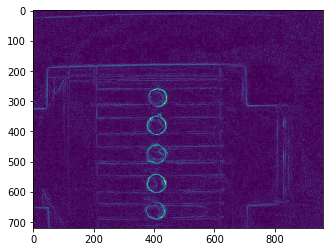

In [69]:
from skimage.filters import sobel
elevation_map = sobel(im)
plt.imshow(elevation_map)

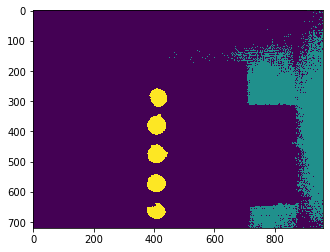

In [75]:
markers = np.zeros_like(im) #markers are really important to select features, play with it if you have problems.
markers[im < 30] = 1
markers[im > 100] = 2
plt.imshow(markers)

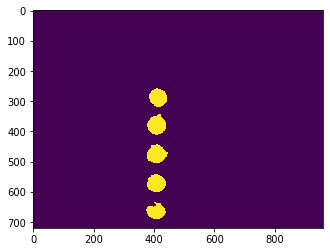

In [76]:
from skimage.morphology import watershed
segmentation = watershed(elevation_map, markers)
plt.imshow(segmentation)

In [77]:
segmentation = ndi.binary_fill_holes(segmentation - 1)

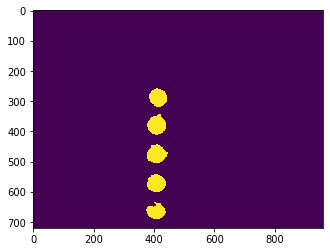

In [78]:
plt.imshow(segmentation)

In [83]:
labeled_discs, _ = ndi.label(segmentation)

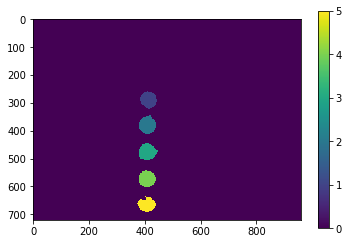

In [88]:
plt.imshow(labeled_discs)
plt.colorbar()

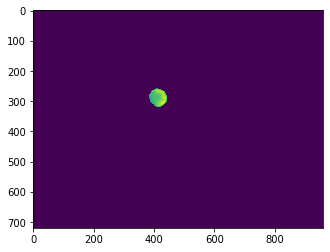

In [103]:
disc1 = labeled_discs==1
plt.imshow(disc1*im)

In [104]:
area = np.sum(disc1)
totalfluo = np.sum(disc1*im)
avfluo = totalfluo/area
avfluo

124.00896700143473

In [28]:
#edges = canny(image, sigma=3, low_threshold=10, high_threshold=50) in can try this later